# ML::Machine Learning

The task at hand for Machine learning considers a set of inputs and outputs. Machine learning is a fluid term that describes several methods that use a set of data (input) to make predictions (output) on new data. Roughly these can be clustered as **Unsupervised** and **Supervised** methods.

### Unsupervised

![Unsupervised](images/unsupervised.png)

*The method finds clusters by using the features of data. No labeling available.*

These methods are used with unlabeled data, so ony input, and defines a set of viable outputs. The model uses the distribution of features to:

- **Cluster**: Group similar data.
- **Reduce Dimensionality**: Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Principal Component Analysis (PCA) for example, which finds summary indices.

### Supervised

![Supervised](images/supervised.png)

*Labeled Data is used to make predictions of labels.*

These methods are trained on data with the right output. The algorithms fits a map from inputs to outputs to be able to predict the labels of new data.

- **Regression**: Labels are real values. The value of a commodity for example. Methods like Lasso regression, we saw earlier.
- **Classification**: Here the labels are classes. For example predicting which candidate people are going to vote for. Methods like Random-Forest classifier.


This is not a complete list, and variations of the two exist. Oftentimes the most usefult method depends on the data, the questions, and constraints on the tools available. 


In [7]:
# Basics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm

In [8]:
import numpy

**there might be an issue with sklearn and numpy
 in that case create a new environment and install sklearn first
 with conda**
 
conda create --name sklearn_env

conda activate sklearn_env

conda install scikit-learn matplotlib pandas jupyter astropy

python -m ipykernel install --user --name sklearn_env --display-name "Python (sklearn)"

**then you should be able to start a new kernel Python (sklearn)**

In [11]:
# To create synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 200, n_classes = 2, n_features=1, n_redundant=0, n_informative=1,
                           random_state=21, n_clusters_per_class=1)

1) n_sample: The number of samples.

2) n_classes: The number of classes (or labels) of the classification problem.

3)  n_features: The total number of features.

4) n_redundant: The number of redundant features. These features are generated as random linear combinations of the informative features.
        
5) n_informative: The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
  
6) random_state.
  
7) n_clusters_per_classint.

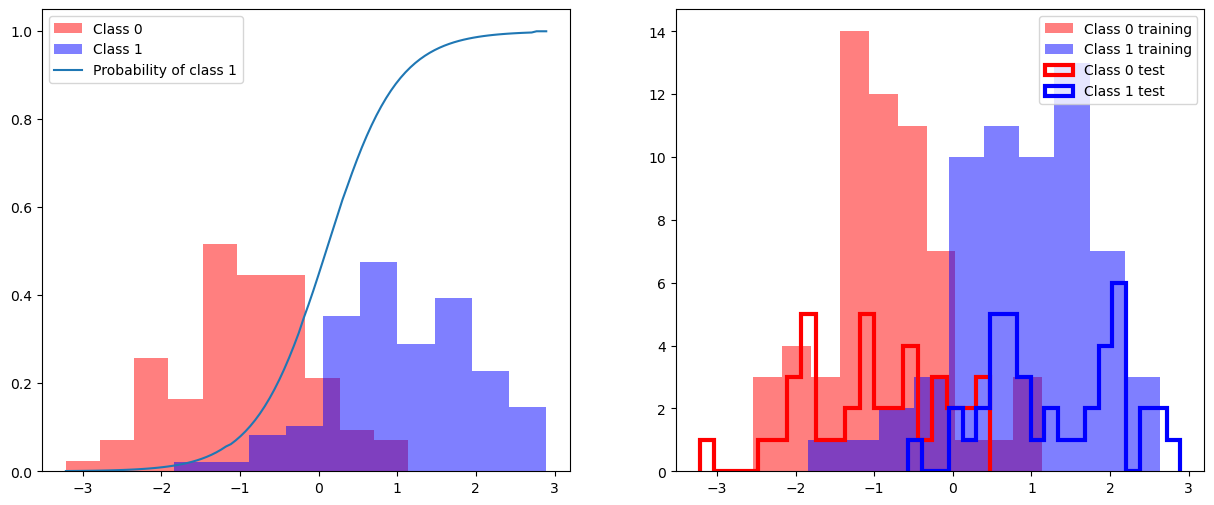

In [16]:
# for splitting data into training and testing
from sklearn.model_selection import train_test_split
# Support vector machine, C-support vector classifier
from sklearn.svm import SVC
# metrics 
from sklearn import metrics

# histograms of the two classes
fig, ax = plt.subplots(ncols = 2, figsize = (15, 6))
ax[0].hist(X[y == 0], color = 'r', alpha = 0.5, label = "Class 0", density = True);
ax[0].hist(X[y == 1], color = 'b', alpha = 0.5, label = "Class 1", density = True);

# split the data and plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=30)
ax[1].hist(X_train[y_train == 0], color = 'r', alpha = 0.5, label = "Class 0 training");
ax[1].hist(X_train[y_train == 1], color = 'b', alpha = 0.5, label = "Class 1 training");
ax[1].hist(X_test[y_test == 0], color = 'r', histtype = 'step', lw = 3, label = "Class 0 test", bins=20);
ax[1].hist(X_test[y_test == 1], color = 'b', histtype = 'step', lw = 3, label = "Class 1 test", bins=20);

# train a c-support vector classifier and plot the probability
clf = SVC(kernel="linear", C=0.01, probability=True)
clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:, 1]

xs = np.linspace(min(X), max(X), 100)
xs = xs
probs = clf.predict_proba(xs)[:, 1]
ax[0].plot(xs, probs, label = "Probability of class 1")
ax[0].legend()
ax[1].legend()

Text(0, 0.5, 'True positive rate')

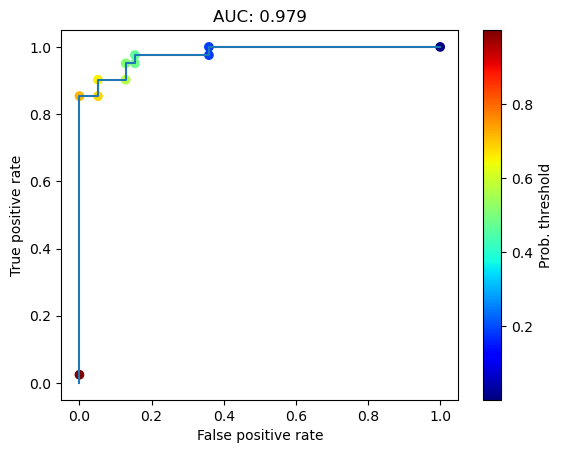

In [17]:
# get the ROC curve
fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
fig, ax = plt.subplots()
ax.set_title("AUC: %.3f" % metrics.roc_auc_score(y_test, y_test_pred))
ax.plot(fpr, tpr)
sc = ax.scatter(fpr, tpr, lw = 1, c = thresh, cmap = matplotlib.cm.jet)
cb = plt.colorbar(sc)
cb.set_label('Prob. threshold')
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")


Text(0, 0.5, 'F1-score')

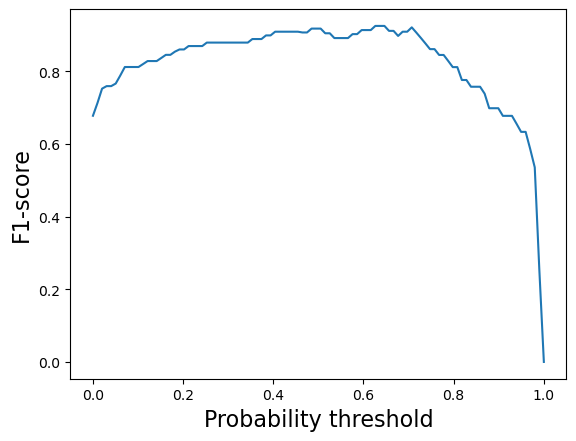

In [18]:
# get F1 score for different probability thresholds
fig, ax = plt.subplots()
xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(y_test, y_test_pred >= prob), xs))
ax.plot(xs, f1scores)
ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16)


# This is from the datalab at the NOIRLab institution


In [1]:
# std library imports
from getpass import getpass

# 3rd party
import numpy as np
import pylab as plt
import matplotlib
from astropy import utils, io
from astropy.visualization import make_lupton_rgb
%matplotlib inline

# Data Lab and related imports

# You'll need at least these for authenticating and for issuing database queries
from dl import authClient as ac, queryClient as qc

# Get helpers for various convenience function
from dl.helpers.utils import convert

# You'll want storeClient if you plan to use virtual storage or myDB
# from dl import storeClient as sc

# To get image cutouts, you'll need the VO-based SIA package, and define which SIA service to use
from pyvo.dal import sia
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1" # DES SIA service URL
svc = sia.SIAService(DEF_ACCESS_URL)

In [2]:
token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
ac.whoAmI()


Enter user name: (+ENTER) cesar@das.uchile.cl
Enter password: (+ENTER) ········


'fuentes'

In [3]:
print(qc.schema())


     Schema Name   Description
     -----------   -----------
         allwise   The AllWISE data release
     buzzard_dr1   Buzzard Data Release 1
     catwise2020   CatWise 2020 data, containing the main catalog with 191 co
                   lumns and 1.89 billion rows
         dad_dr1   DECam Asteroid Database -- Data Release 1
         dad_dr2   DECam Asteroid Database -- Data Release 2
      decaps_dr1   DECaPS Survey Data Release 1
      decaps_dr2   DECaPS Survey Data Release 2
       delve_dr1   First data release of the DELVE survey (Drlica-Wagner et a
                   l. 2020)
       delve_dr2   Second data release of the DELVE survey
         des_dr1   Dark Energy Survey (DES) Data Release 1
         des_dr2   Dark Energy Survey (DES) Data Release 2
        des_sva1   DES SVA1 Data Products
        desi_edr   Early Data Release from the Dark Energy Spectroscopic Inst
                   rument
          dltest   
        gaia_dr1   GAIA Data Release 1
        gaia_dr2   G

In [4]:
print(qc.schema('smash_dr1'))



Schema: smash_dr1

      Table Name   Description
      ----------   -----------
            chip   Info on each chip in the frame
        exposure   Info on each exposure
           field   Info on each target field (position, Num exposures, etc)
        galaxies   View of object table to select for galaxies
          object   Average photometry of each unique object
          source   All of the individual source measurements
           stars   View of object table to select for stars
x1p5__object__gaia_dr3__gaia_source   smash_dr1.object and gaia_dr3.gaia_source crossmatch (1.5 
                   arcsec)
x1p5__object__nsc_dr2__object   smash_dr1.object and nsc_dr2.object crossmatch (1.5 arcsec)
x1p5__object__unwise_dr1__object   smash_dr1.object and unwise_dr1.object crossmatch (1.5 arcsec)
          xmatch   Crossmatch of object against GAIA DR1 and WISE



In [5]:
query = "SELECT * FROM smash_dr1.object LIMIT 10"
result = qc.query(sql=query) # by default the result is a CSV formatted string

In [6]:
print(type(result))
print(result[:1000]) # print just the first 1000 characters of the returned string


<class 'str'>
ra,dec,glon,glat,elon,elat,htm9,ring256,nest4096,random_id,raerr,decerr,umag,uerr,uscatter,gmag,gerr,gscatter,rmag,rerr,rscatter,imag,ierr,iscatter,zmag,zerr,zscatter,u_g,g_r,g_i,i_z,chi,sharp,prob,ebv,ndet,depthflag,ndetu,ndetg,ndetr,ndeti,ndetz,flag,fieldid,id
279.4606527958308,-78.24354721958477,315.99160807502335,-25.82778890984967,273.34020907179075,-54.91398229635952,2958454,778310,185243258,47.305466,0.10210784,0.10210784,99.99,9.99,99.99,99.99,9.99,99.99,24.271788,0.25550756,99.99,23.845789,0.21805128,0.01635463,23.53427,0.38533443,99.99,0,0,0,0.31151962,0.7674999,1.19,0.49,0.14216651,4,2,0,0,1,2,1,0,180,180.454843
279.46139886553027,-78.24332898803907,315.99187450183103,-25.827903902574977,273.3405150042477,-54.913782773236136,2958454,778310,185243258,11.831146,0.016997045,0.016997045,99.99,9.99,99.99,23.283722,0.05074217,0.0636483,22.00499,0.019846566,0.042791083,21.580702,0.020819865,0.08101747,21.215338,0.028549572,0.030775072,0,1.2787323,1.7030201,0.36536407,

In [7]:
df = convert(result,'pandas')
df.head()

,ra,dec,glon,glat,elon,elat,htm9,ring256,nest4096,random_id,...,ndet,depthflag,ndetu,ndetg,ndetr,ndeti,ndetz,flag,fieldid,id
0,279.460653,-78.243547,315.991608,-25.827789,273.340209,-54.913982,2958454,778310,185243258,47.305466,...,4,2,0,0,1,2,1,0,180,180.454843
1,279.461399,-78.243329,315.991875,-25.827904,273.340515,-54.913783,2958454,778310,185243258,11.831146,...,18,3,0,4,4,6,4,0,180,180.243840
2,279.467810,-78.246538,315.988588,-25.829708,273.342137,-54.917120,2958454,778310,185243258,73.041756,...,3,2,0,0,1,1,1,0,180,180.454614
3,279.470692,-78.243772,315.991726,-25.829844,273.343700,-54.914439,2958454,778310,185243258,70.024670,...,3,2,0,0,0,2,1,0,180,180.509905
4,279.471193,-78.243650,315.991878,-25.829925,273.343901,-54.914329,2958454,778310,185243258,85.679535,...,1,1,0,0,0,1,0,-1,180,180.655086


In [8]:
query = "SELECT * FROM smash_dr1.object LIMIT 10"
df = qc.query(sql=query,fmt='pandas')
df.head()


,ra,dec,glon,glat,elon,elat,htm9,ring256,nest4096,random_id,...,ndet,depthflag,ndetu,ndetg,ndetr,ndeti,ndetz,flag,fieldid,id
0,279.460653,-78.243547,315.991608,-25.827789,273.340209,-54.913982,2958454,778310,185243258,47.305466,...,4,2,0,0,1,2,1,0,180,180.454843
1,279.461399,-78.243329,315.991875,-25.827904,273.340515,-54.913783,2958454,778310,185243258,11.831146,...,18,3,0,4,4,6,4,0,180,180.243840
2,279.467810,-78.246538,315.988588,-25.829708,273.342137,-54.917120,2958454,778310,185243258,73.041756,...,3,2,0,0,1,1,1,0,180,180.454614
3,279.470692,-78.243772,315.991726,-25.829844,273.343700,-54.914439,2958454,778310,185243258,70.024670,...,3,2,0,0,0,2,1,0,180,180.509905
4,279.471193,-78.243650,315.991878,-25.829925,273.343901,-54.914329,2958454,778310,185243258,85.679535,...,1,1,0,0,0,1,0,-1,180,180.655086


In [9]:
# NGC 288 (a globular cluster)
ra = 13.19     # in decimal degrees
dec = -26.59   # in decimal degrees

fov = 13/60  # image cutout field of view (in degrees; here 13 arminutes = 0.22 degrees)

imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()  # uses declination correction

In [10]:
imgTable

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
des_dr1,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=1&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667",image/fits,87384,,,2,0,0,2,[10000 10000],,,[0.27],,des_dr1,,DES DR1,archival,,,DECam,,,,ivo://datalab.noirlab/vo#ivoa_des_dr1.siav1:ivo://datalab.noao/des_dr1/DES0052-2623_r2628p04_det.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=1&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667&preview=true",,,13.0308,-26.3966,--,,,--,-2.98156e-39,2.98156e-39,--,--,--,--,--,--,,,,DES0052-2623,0,DES DR1,30,image,0,0,,1350,,Stack,,556997.0815869,0
des_dr1,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=2&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667",image/fits,87384,,,2,0,0,2,[10000 10000],,,[0.27],,des_dr1,,DES DR1,archival,,,DECam,,,,ivo://datalab.noirlab/vo#ivoa_des_dr1.siav1:ivo://datalab.noao/des_dr1/DES0052-2623_r2628p04_det.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=2&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667&preview=true",,,13.0308,-26.3966,--,,,--,-3.05931e-41,3.05931e-41,--,--,--,--,--,--,,,,DES0052-2623,0,DES DR1,30,mask,0,0,,1350,,Stack,,556997.0815869,0
des_dr1,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=3&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667",image/fits,87384,,,2,0,0,2,[10000 10000],,,[0.27],,des_dr1,,DES DR1,archival,,,DECam,,,,ivo://datalab.noirlab/vo#ivoa_des_dr1.siav1:ivo://datalab.noao/des_dr1/DES0052-2623_r2628p04_det.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_det.fits.fz&extn=3&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667&preview=true",,,13.0308,-26.3966,--,,,--,-8.96831e-44,8.96831e-44,--,--,--,--,--,--,,,,DES0052-2623,0,DES DR1,30,weight,0,0,,1350,,Stack,,556997.0815869,0
des_dr1,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_g.fits.fz&extn=1&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667",image/fits,165791,,,2,0,0,2,[10000 10000],,,[0.27],,des_dr1,,DES DR1,archival,,,DECam,g,,,ivo://datalab.noirlab/vo#ivoa_des_dr1.siav1:ivo://datalab.noao/des_dr1/DES0052-2623_r2628p04_g.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_g.fits.fz&extn=1&POS=13.19,-26.59&SIZE=0.2422934725574616,0.21666666666666667&preview=true",,,13.0308,-26.3966,--,,,--,3960.0,5480.0,--,--,--,--,--,--,,,,DES0052-2623,0,DES DR1,30,image,0,0,,540,,Stack,,557004.06109019,0
des_dr1,"https://datalab.noirlab.edu/svc/cutout?col=des_dr1&siaRef=DES0052-2623_r2628p04_g.fits.fz&e

In [19]:
# Get data to predict|

In [11]:
# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.utils.data import download_file  #import file from URL
%matplotlib inline

# Data Lab
from dl import queryClient as qc

In [12]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT dered_mag_g as gmag, dered_mag_r as rmag, dered_mag_z as zmag, 
               dered_mag_w1 as w1mag, dered_mag_w2 as w2mag, type,
               snr_g, snr_r, snr_z, snr_w1, snr_w2, ra, dec 
        FROM ls_dr9.tractor
        WHERE (snr_g>5 and snr_r>5 and snr_z>5 and snr_w1>5 and snr_w2>5 and random_id<0.1)
        LIMIT 400000"""
 
# dered_mag_g,r,z  = AB magnitudes in DECam g,r,z bands corrected for Galactic reddening
# dered_mag_w1,w2  = AB magnitudes in WISE bands W1 & W2 corrected for Galactic reddening
# type             = object type (PSF, SIMP, EXP, DEV, COMP)
# snr_g,r,z        = pre-computed signal-to-noise ratios (S/N) in g,r,z bands
# snr_w1,w2        = pre-computed signal-to-noise ratios (S/N) in W1 & W2 bands
# ra,dec           = celestial coordinates
# random_id        = random ID (0-100) to select a small fraction objects randomly distributed on the sky
#
# WHERE: requirement that S/N>5 in each LS band
# LIMIT: returns 400,000 rows that satisfy the query

print(query)


        SELECT dered_mag_g as gmag, dered_mag_r as rmag, dered_mag_z as zmag, 
               dered_mag_w1 as w1mag, dered_mag_w2 as w2mag, type,
               snr_g, snr_r, snr_z, snr_w1, snr_w2, ra, dec 
        FROM ls_dr9.tractor
        WHERE (snr_g>5 and snr_r>5 and snr_z>5 and snr_w1>5 and snr_w2>5 and random_id<0.1)
        LIMIT 400000


In [21]:
# Execute the Query synchronously if short (e.g., LIMIT<=400,000)
result = qc.query(sql=query, fmt='pandas')


In [22]:
# Print a few rows from the result (pandas DataFrame)
print(len(result))
print(result[:5])

268005
        gmag       rmag       zmag      w1mag      w2mag type        snr_g  \
0  23.044521  21.341413  20.615875  20.024673  20.628265  DEV    17.896101   
1  15.763890  15.097550  14.893347  16.105503  16.806711  PSF  1283.366700   
2  19.106127  17.751947  16.931606  17.608112  18.223060  PSF   487.070680   
3  15.658857  15.202118  15.095008  16.512575  17.174395  PSF  2558.850000   
4  22.515300  21.080187  20.296516  19.756900  19.975266  REX    25.293540   

         snr_r        snr_z      snr_w1      snr_w2          ra        dec  
0    48.675056    55.289436   18.349790    5.133045   73.845016  -8.516546  
1   617.863160   351.374180  297.433840  113.184044  155.422672 -30.047779  
2   822.325100   999.688230  119.268425   36.151608  188.249308  -7.802713  
3  3599.872600  2017.284900  261.863160   97.214570  351.941695  31.012169  
4    53.934814    47.962627   22.168630    8.784081  188.717069  29.662096  


In [23]:
# Colors
g_r   = result['gmag'] - result['rmag']
r_z   = result['rmag'] - result['zmag']
z_w1  = result['zmag'] - result['w1mag']
w1_w2 = result['w1mag'] - result['w2mag']

# Classification per object type
objtype = result['type']

# List of object types (ignoring DUP, which have zero fluxes)
typeList = ['All','PSF','REX','EXP','DEV','SER']

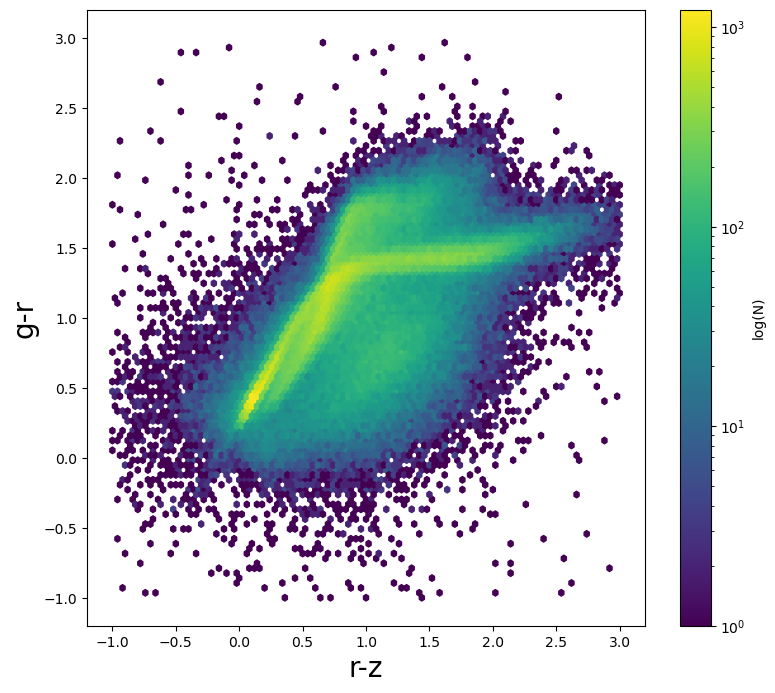

In [24]:
#r-z vs. g-r colors

# 2D-histogram of objects
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
im1 = ax1.hexbin(r_z, g_r, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
ax1.set_xlabel('r-z',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)

#color bar
cb = plt.colorbar(im1,label='log(N)')

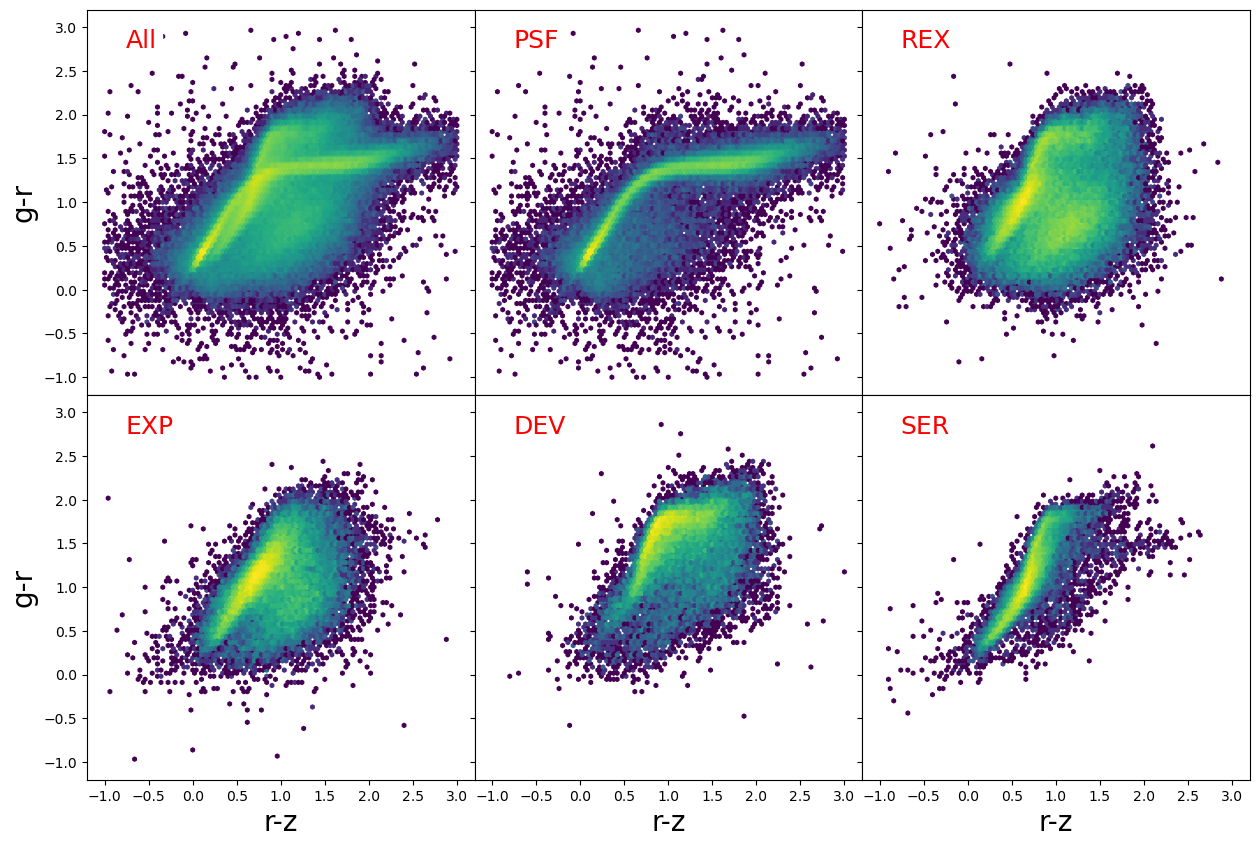

In [26]:
col0 = r_z   #r-z color
col1 = g_r   #g-r color

# Define figure to have 6 panels: 2 rows X 3 columns (with shared axes)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()   # flatten axes object to be able to loop over it

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(col0),dtype='bool')   #for All objects: array of 1's
    else:
        selec = (objtype==typ)    #for each type, select on the type parameter
    # 2D-histogram of objects with hexagonal bins
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
    if i>=3: ax.set_xlabel('r-z',fontsize=20)   #only label x axis for second (last) row
    if i%3==0: ax.set_ylabel('g-r',fontsize=20) #only label y axis for first column
    # Label the type on each panel (red font over white background)
    ax.text(0.1,0.9,typ,transform=ax.transAxes,fontsize=18,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0., hspace=0.)
plt.show()


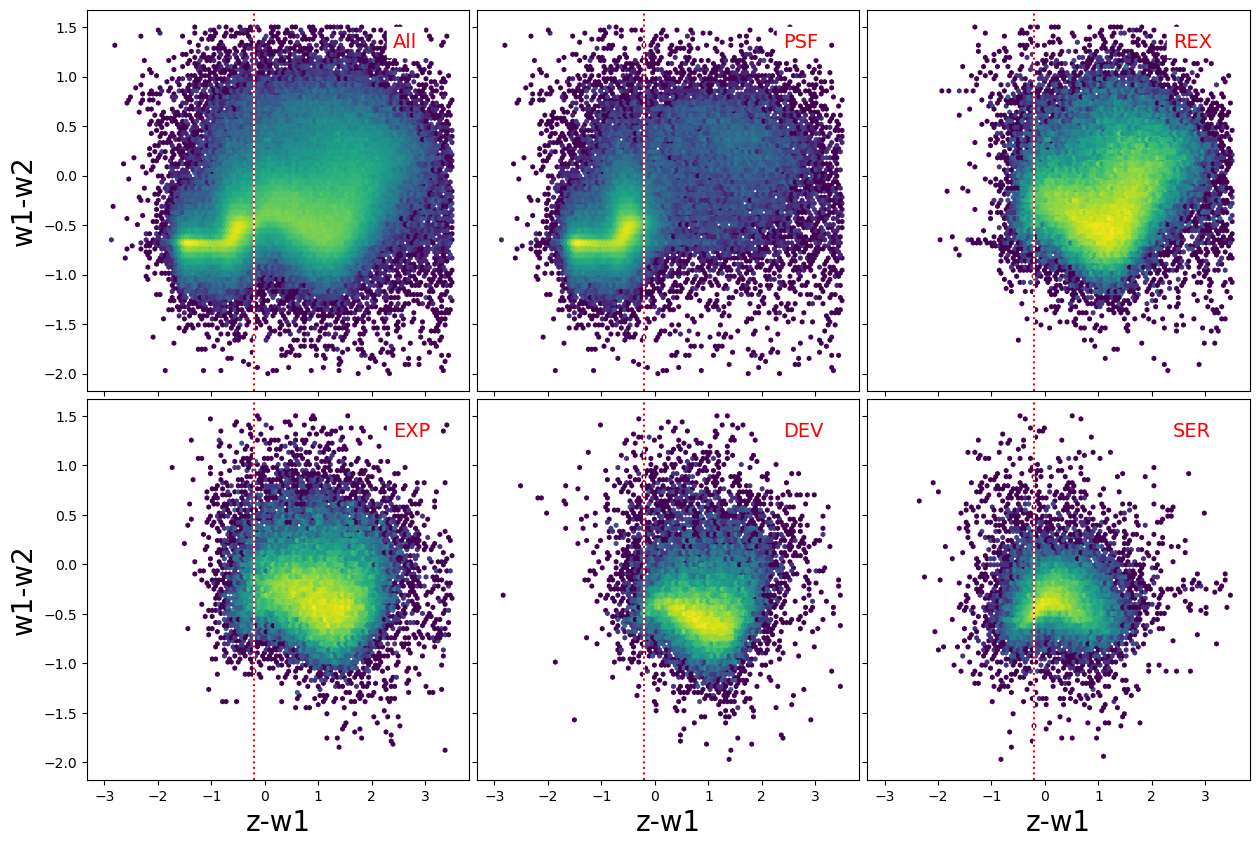

In [27]:
# First, try z-W1 versus infrared color W1-W2
col0 = z_w1
col1 = w1_w2

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype),dtype='bool')
    else:
        selec = (objtype==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3.5, -2., 1.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('w1-w2',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')
    ax.axvline(-0.2,color='w',ls='-')
    ax.axvline(-0.2,color='r',ls=':')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

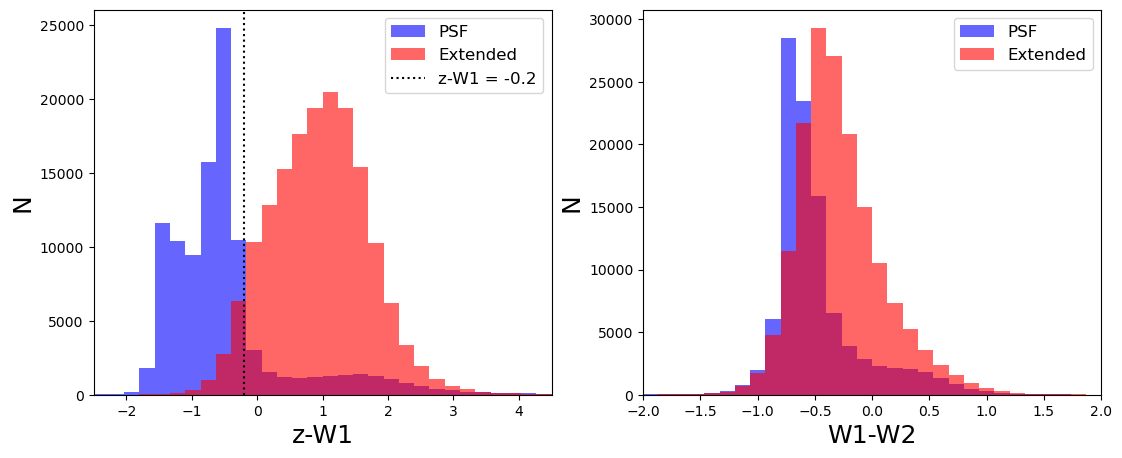

In [28]:
is_psf = (objtype=='PSF')

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes = axes.flatten()

colors = [z_w1, w1_w2]
colnames = ['z-W1', 'W1-W2']
xlims = [[-2.5,4.5],[-2.,2.]]

for i,col in enumerate(colors):
    ax = axes[i]
    ax.hist(col[is_psf], 30, range=xlims[i], color='b', alpha=0.6, label='PSF')
    ax.hist(col[~is_psf], 30, range=xlims[i], color='r', alpha=0.6, label='Extended')
    ax.set_xlabel(colnames[i],fontsize=18)
    ax.set_ylabel('N',fontsize=18)
    ax.set_xlim(xlims[i])
    if i==0: ax.axvline(-0.2, ls=':', color='k', label='z-W1 = -0.2')
    ax.legend(fontsize=12)

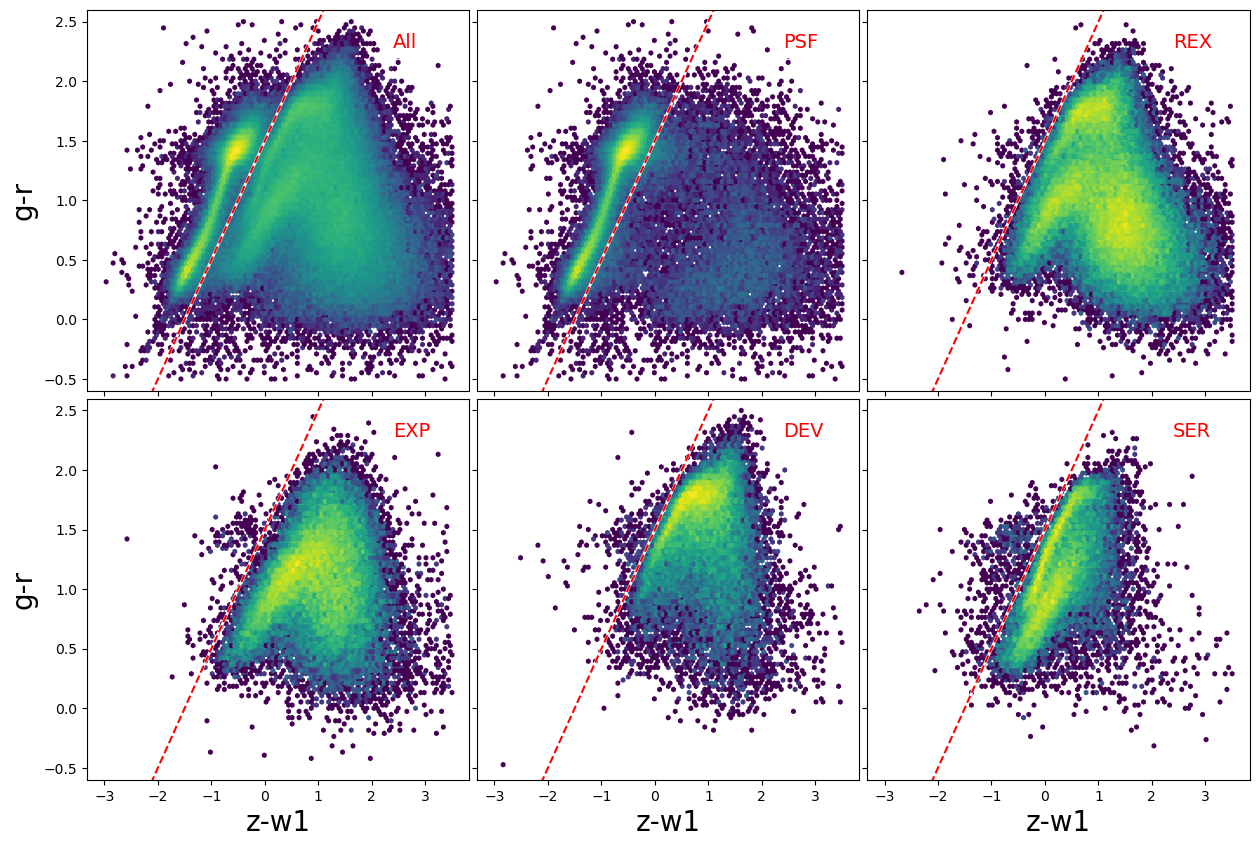

In [29]:
# Combine g-r with z-W1 color (latter has more separation power than W1-W2)
col0 = z_w1
col1 = g_r

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

x = np.arange(-2.3,2.3,0.05)

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype),dtype='bool')
    else:
        selec = (objtype==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3.5, -0.5, 2.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('g-r',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')
    ax.plot(x, 1.0*x+1.5, '-',lw=2,color='w')
    ax.plot(x, 1.0*x+1.5, '--',color='red')
    ax.set_ylim(-0.6,2.6)

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

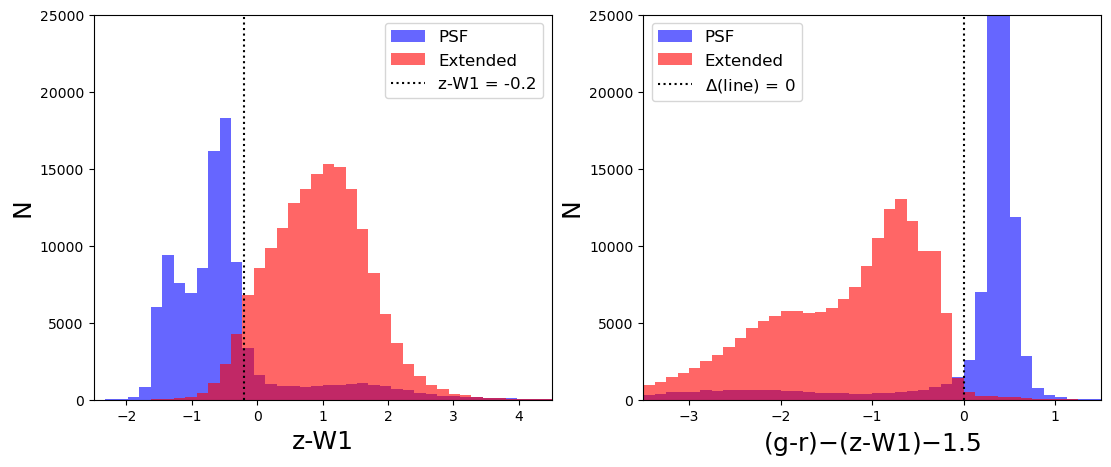

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes = axes.flatten()

#g_r_line = 1.0*z_w1+1.6

colors = [z_w1, g_r-z_w1-1.5]
colnames = ['z-W1', '(g-r)$-$(z-W1)$-$1.5']
xlims = [[-2.5,4.5],[-3.5,1.5]]

for i,col in enumerate(colors):
    ax = axes[i]
    ax.hist(col[is_psf], 40, range=xlims[i], color='b', alpha=0.6, label='PSF')
    ax.hist(col[~is_psf], 40, range=xlims[i], color='r', alpha=0.6, label='Extended')
    ax.set_xlabel(colnames[i],fontsize=18)
    ax.set_ylabel('N',fontsize=18)
    ax.set_xlim(xlims[i])
    ax.set_ylim(0,2.5e4)    ## Comment out this y-range limit to see the full histograms
    if i==0: ax.axvline(-0.2, ls=':', color='k', label='z-W1 = -0.2')
    if i==1: ax.axvline(0., ls=':', color='k', label='$\Delta$(line) = 0')
    ax.legend(fontsize=12)

In [ ]:
|